<a href="https://colab.research.google.com/github/AlexUrtubia/music_genre_prediction/blob/main/P2_Limpiando_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

El proyecto número 2, contempla la libre elección de algún dataset al que se le pueda aplicar modelos de machine learning.

Para este caso, se ha seleccionado el conjunto 'Music Genre Classification' obtenido desde Kaggle, al cual se le puede aplicar una clasificación multiclase.

Este contiene información relacionada a cada canción que compone el dataset, entre estas 2 columnas de distintos atributos relacionados con la misma, tales como el nombre de la canción, del artísta medidas como objectos, y 14 mediciones relacionadas con la popularidad, bailabilidad, energía, llave, volumen, modo, la letra, la acústica, la instrumentalidad, vivacidad, valencia, tempo, duración y signatura del compás de cada canción.

Para este caso, la columna objetivo es el género mismo de cada canción, que puede encontrarse dentro de 10 clases distintas. 
Estas son: Rock, Indie, Alt, Pop, Metal, HipHop, Alt_Music, Blues, Acoustic/Folk, Instrumental, Country o Bollywood.

Music Genre Classification.

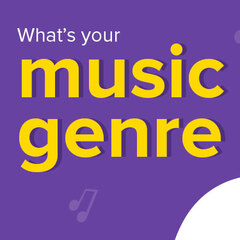

https://www.kaggle.com/datasets/purumalgi/music-genre-classification

In [4]:
# Se importan las librerías necesarias para la manipulación y visualización de los datos.

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Se cargan los datos y se imprimen los primeros 30

df = pd.read_csv('/content/drive/MyDrive/Proyecto 2/music/train.csv')
df.head(30)

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.000000,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.000000,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.000000,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.000000,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.000000,4,10
5,The Stooges,Search and Destroy - Iggy Pop Mix,53.0,0.235,0.977,6.0,0.878,1,0.1070,0.003530,0.006040,0.1720,0.2410,152.952,208133.000000,4,6
6,Solomon Burke,None Of Us Are Free,48.0,0.674,0.658,5.0,-9.647,0,0.1040,0.404000,0.000001,0.0981,0.6770,143.292,329387.000000,4,2
7,Randy Travis,On the Other Hand,55.0,0.657,0.415,5.0,-9.915,1,0.0250,0.175000,0.000006,0.1320,0.3470,96.030,3.105783,4,4
8,Professional Murder Music,Slow,29.0,0.431,0.776,10.0,-5.403,1,0.0527,0.000022,0.001300,0.1790,0.3180,120.857,237867.000000,4,8
9,Dudu Aharon,"◊ì◊ï◊ì◊ï, ◊ô◊ê◊ú◊ú◊î ◊ô◊ê◊ú◊ú◊î",14.0,0.716,0.885,1.0,-4.348,0,0.0333,0.061400,NaN,0.2530,0.8330,128.043,164093.000000,4,9


In [6]:
# Se consulta la información del dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         17996 non-null  object 
 1   Track Name          17996 non-null  object 
 2   Popularity          17568 non-null  float64
 3   danceability        17996 non-null  float64
 4   energy              17996 non-null  float64
 5   key                 15982 non-null  float64
 6   loudness            17996 non-null  float64
 7   mode                17996 non-null  int64  
 8   speechiness         17996 non-null  float64
 9   acousticness        17996 non-null  float64
 10  instrumentalness    13619 non-null  float64
 11  liveness            17996 non-null  float64
 12  valence             17996 non-null  float64
 13  tempo               17996 non-null  float64
 14  duration_in min/ms  17996 non-null  float64
 15  time_signature      17996 non-null  int64  
 16  Clas

In [ ]:
# Tambié se consulta por información estadística utilizando el método describe.

df.describe()

# Se observa que no hay datos atípicos.

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,17568.000000,17996.000000,17996.000000,15982.000000,17996.000000,17996.000000,17996.000000,17996.000000,13619.000000,17996.000000,17996.000000,17996.000000,1.799600e+04,17996.000000,17996.000000
mean,44.512124,0.543433,0.662777,5.952447,-7.910660,0.636753,0.079707,0.247082,0.177562,0.196170,0.486208,122.623294,2.007445e+05,3.924039,6.695821
std,17.426928,0.166268,0.235373,3.196854,4.049151,0.480949,0.083576,0.310632,0.304048,0.159212,0.240195,29.571527,1.119891e+05,0.361618,3.206073
min,1.000000,0.059600,0.000020,1.000000,-39.952000,0.000000,0.022500,0.000000,0.000001,0.011900,0.018300,30.557000,5.016500e-01,1.000000,0.000000
25%,33.000000,0.432000,0.509000,3.000000,-9.538000,0.000000,0.034800,0.004300,0.000089,0.097500,0.297000,99.620750,1.663370e+05,4.000000,5.000000
50%,44.000000,0.545000,0.700000,6.000000,-7.016000,1.000000,0.047400,0.081400,0.003910,0.129000,0.481000,120.065500,2.091600e+05,4.000000,8.000000
75%,56.000000,0.659000,0.860000,9.000000,-5.189000,1.000000,0.083000,0.434000,0.200000,0.258000,0.672000,141.969250,2.524900e+05,4.000000,10.000000
max,100.000000,0.989000,1.000000,11.000000,1.355000,1.000000,0.955000,0.996000,0.996000,1.000000,0.986000,217.416000,1.477187e+06,5.000000,10.000000


In [17]:
# Se comprueba la existencia de datos duplicados

df.duplicated().sum()

0

In [ ]:
# Al consultar por las columnas que presentan datos nulos, se observa que estas son las relacionadas con
# la popularidad, la clave de la canción y la instrumentalidad de la canción.

df.isnull().sum()

Artist Name              0
Track Name               0
Popularity             428
danceability             0
energy                   0
key                   2014
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      4377
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64

In [7]:
# En total son 6819 datos faltantes

df.isnull().sum().sum()

6819

Se observa que los datos nulos se encuentran en tres columnas: Popularidad, Nota e instrumentalidad, y que en total son 6819 datos faltantes.

Se procede a buscar relaciones entre los datos faltantes y el resto de las columnas.

In [8]:
# Se aplica un filtro con los datos nulos de la columna 'Popularity'

df[df['Popularity'].isnull()]

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
25,"IndianRaga, Akshay Anantapadmanabhan, Madhu Iy...",Swagatham Krishna - Mohanam - Adi,NaN,0.548,0.711,10.0,-8.440,1,0.1070,0.542000,0.000096,0.3550,0.618,119.675,4.015633,3,0
43,Lilly Wood and The Prick,A Song,NaN,0.618,0.438,11.0,-7.495,1,0.0762,0.407000,NaN,0.5000,0.651,155.014,209307.000000,4,6
51,How Lucky,"Kurt Vile, John Prine",NaN,0.523,0.441,5.0,-9.928,1,0.0311,0.465000,0.002680,0.3650,0.490,171.246,3.385117,4,0
95,The Beatles,She's Leaving Home - Remastered,NaN,0.381,0.214,4.0,-11.629,1,0.0337,0.944000,NaN,0.1060,0.393,127.581,3.586000,3,0
111,Faith No More,Falling to Pieces,NaN,0.545,0.919,2.0,-7.679,1,0.0483,0.002690,0.005120,0.0978,0.386,104.364,313573.000000,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17741,Westlife,That's Where You Find Love,NaN,0.464,0.493,2.0,-5.626,1,0.0302,0.273000,NaN,0.2210,0.244,120.990,3.741783,4,9
17855,Avarus,Sadist,NaN,0.502,0.991,6.0,-4.612,1,0.1350,0.000173,0.000017,0.3320,0.285,99.953,191100.000000,4,10
17873,Erika de Casier,Someone to Chill With,NaN,0.610,0.757,2.0,-6.271,0,0.0377,0.075400,0.010600,0.1470,0.468,162.050,199705.000000,4,6
17912,Hype Lights,Something Wrong,NaN,0.385,0.983,4.0,-4.052,0,0.1060,0.000098,0.000010,0.2910,0.354,156.987,162803.000000,4,10


In [ ]:
# Al mismo filtro, se le consultan las estadísticas para comprobar alguna relación.

df[df['Popularity'].isnull()].describe()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,0.0,428.000000,428.000000,369.000000,428.000000,428.000000,428.000000,428.000000,313.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000
mean,NaN,0.541383,0.603803,5.742547,-8.826393,0.689252,0.076764,0.329029,0.178361,0.184987,0.464041,120.510682,117298.171377,3.899533,5.712617
std,NaN,0.155787,0.268523,3.276457,5.300738,0.463341,0.081438,0.349015,0.319957,0.132891,0.250633,30.145687,116846.699306,0.376971,3.729009
min,NaN,0.059600,0.001210,1.000000,-39.952000,0.000000,0.024000,0.000004,0.000001,0.033600,0.032900,50.658000,1.707267,1.000000,0.000000
25%,NaN,0.443750,0.410000,2.000000,-10.435000,0.000000,0.033075,0.005940,0.000046,0.101000,0.256250,98.056750,3.850671,4.000000,2.000000
50%,NaN,0.539500,0.627500,6.000000,-7.313500,1.000000,0.045900,0.158000,0.002240,0.126500,0.444000,119.904000,149500.000000,4.000000,6.000000
75%,NaN,0.644750,0.817000,9.000000,-5.462500,1.000000,0.082625,0.651250,0.142000,0.252750,0.656500,138.733750,215116.500000,4.000000,9.000000
max,NaN,0.899000,0.998000,11.000000,-1.382000,1.000000,0.540000,0.995000,0.941000,0.989000,0.969000,204.955000,505093.000000,5.000000,10.000000


Se procede a realizar la misma búsqueda con las otras dos columnas con datos faltantes.

In [ ]:
df[df['key'].isnull()]

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
33,Dreezy,Where Them $ @,42.0,0.858,0.5250,NaN,-7.332,1,0.1480,0.044300,0.007380,0.1970,0.351,170.875,193962.000000,4,5
34,The Ayoub Sisters,Mother's Pride,16.0,0.297,0.0958,NaN,-20.316,1,0.0384,0.844000,0.855000,0.1260,0.296,80.672,3.503783,4,7
36,Moon Guitar,Struna,47.0,0.320,0.2420,NaN,-15.170,1,0.0422,0.941000,0.930000,0.1650,0.431,81.090,2.817633,4,7
41,Lior Narkis,◊ó◊ú◊ß◊™ ◊ê◊ú◊ï◊î◊ô◊ù - ◊î◊©◊ô◊® ◊©◊ú ◊ê◊ï◊§◊ô◊®,44.0,0.479,0.4440,NaN,-6.497,1,0.0316,0.857000,NaN,0.1410,0.236,107.915,174242.000000,4,9
47,The Clash,The Magnificent Seven - Remastered,56.0,0.799,0.7890,NaN,-8.208,1,0.0395,0.059500,NaN,0.0338,0.831,116.083,333520.000000,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17967,Dudu Tassa,◊î◊ß◊ô◊®,23.0,0.483,0.9440,NaN,-3.371,0,0.0427,0.400000,NaN,0.2610,0.829,164.014,227747.000000,4,10
17970,Dua Lipa,Physical,72.0,0.647,0.8440,NaN,-3.756,1,0.0457,0.013700,0.000658,0.1020,0.746,146.962,193829.000000,4,9
17982,Lucia & The Best Boys,Blueheart,29.0,0.348,0.7260,NaN,-4.730,1,0.0449,0.000363,0.000142,0.3830,0.661,182.587,169164.000000,4,6
17985,Hippie Hourrah,La guerre,2.0,0.610,0.7660,NaN,-8.266,1,0.0267,0.000559,0.174000,0.0887,0.932,118.013,271467.000000,4,6


In [ ]:
df[df['key'].isnull()].describe()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,1955.000000,2014.000000,2014.000000,0.0,2014.000000,2014.000000,2014.000000,2014.000000,1531.000000,2014.000000,2014.000000,2014.000000,2.014000e+03,2014.000000,2014.000000
mean,44.433760,0.540762,0.639815,NaN,-8.128694,0.783515,0.068992,0.262989,0.166437,0.202254,0.496845,122.833917,1.962387e+05,3.909136,6.680735
std,18.042231,0.165709,0.241893,NaN,4.223476,0.411951,0.073726,0.313274,0.302902,0.174251,0.241787,29.874254,1.143858e+05,0.382407,3.276595
min,1.000000,0.059900,0.012300,NaN,-34.797000,0.000000,0.023300,0.000002,0.000001,0.025900,0.022300,47.387000,1.130667e+00,1.000000,0.000000
25%,32.000000,0.432250,0.478250,NaN,-9.798250,1.000000,0.033500,0.008275,0.000058,0.097425,0.309000,100.005000,1.613888e+05,4.000000,5.000000
50%,43.000000,0.545000,0.685000,NaN,-7.143000,1.000000,0.043900,0.110000,0.002000,0.128000,0.493000,120.960000,2.060785e+05,4.000000,8.000000
75%,57.000000,0.651000,0.835000,NaN,-5.194750,1.000000,0.069400,0.457000,0.145500,0.254000,0.686000,141.974000,2.502340e+05,4.000000,10.000000
max,95.000000,0.959000,0.998000,NaN,-1.280000,1.000000,0.872000,0.995000,0.964000,1.000000,0.984000,208.067000,1.392667e+06,5.000000,10.000000


In [ ]:
df[df['instrumentalness'].isnull()]

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.01710,NaN,0.0849,0.8990,134.071,234596.000000,4,5
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.02120,NaN,0.1220,0.5690,107.033,173968.000000,4,5
9,Dudu Aharon,"◊ì◊ï◊ì◊ï, ◊ô◊ê◊ú◊ú◊î ◊ô◊ê◊ú◊ú◊î",14.0,0.716,0.885,1.0,-4.348,0,0.0333,0.06140,NaN,0.2530,0.8330,128.043,164093.000000,4,9
11,Arctic Monkeys,The View From The Afternoon,59.0,0.387,0.922,9.0,-5.192,0,0.0674,0.00487,NaN,0.1870,0.4170,146.478,222947.000000,4,10
12,Eyal Golan,◊ß◊®◊ï◊ë◊î ◊ê◊ú◊ô◊ô,34.0,0.585,0.381,1.0,-7.622,0,0.0463,0.43500,NaN,0.1260,0.3220,143.876,206875.000000,4,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17972,Kanye West,Touch The Sky,69.0,0.552,0.846,9.0,-4.912,1,0.3420,0.01140,NaN,0.3090,0.5540,98.560,236600.000000,1,5
17974,Seventeen Again (feat. Novo Amor),"Charli Adams, Novo Amor",48.0,0.338,0.282,3.0,-10.902,1,0.0293,0.64000,NaN,0.1110,0.0952,141.468,3.408667,3,0
17978,Lil Durk,Love You Too (feat. Kehlani),55.0,0.384,0.820,5.0,-3.928,0,0.2010,0.39700,NaN,0.1140,0.4410,90.712,178605.000000,4,5
17986,John Mayer,"Free Fallin' - Live at the Nokia Theatre, Los ...",71.0,0.315,0.296,5.0,-13.262,1,0.0315,0.77100,NaN,0.7020,0.4350,173.509,4.392883,4,0


In [ ]:
df[df['instrumentalness'].isnull()].describe()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,4262.000000,4377.000000,4377.000000,3894.000000,4377.000000,4377.000000,4377.000000,4377.000000,0.0,4377.000000,4377.000000,4377.00000,4377.000000,4377.000000,4377.000000
mean,48.883857,0.598817,0.655050,5.895994,-6.792076,0.618689,0.109792,0.254913,NaN,0.197660,0.530795,121.96917,171319.847488,3.964359,7.038382
std,19.029748,0.153756,0.203883,3.277902,2.819653,0.485764,0.116897,0.275748,NaN,0.153322,0.217662,29.95555,89178.419859,0.267205,2.970434
min,1.000000,0.122000,0.029200,1.000000,-26.964000,0.000000,0.023000,0.000005,NaN,0.021900,0.037500,52.14500,0.533917,1.000000,0.000000
25%,36.000000,0.495000,0.515000,3.000000,-8.191000,0.000000,0.036400,0.023300,NaN,0.098700,0.368000,96.82200,149297.000000,4.000000,5.000000
50%,49.000000,0.597000,0.674000,6.000000,-6.297000,1.000000,0.054000,0.137000,NaN,0.135000,0.522000,120.85400,190827.000000,4.000000,9.000000
75%,63.000000,0.707000,0.818000,9.000000,-4.852000,1.000000,0.133000,0.435000,NaN,0.266000,0.703000,142.76700,223173.000000,4.000000,9.000000
max,100.000000,0.974000,0.998000,11.000000,0.943000,1.000000,0.955000,0.993000,NaN,0.992000,0.986000,209.84000,556227.000000,5.000000,10.000000


Al comprobar si es que existe alguna rrelación entre estos datos faltantes y las demás columnas, se observa que no pareciera existir alguna, es decir, los datos faltantes están distribuidos de manera 'aleatoria' entre el dataset.

¿Qué tanta información aportan estas columnas a la clase o tipo de género?

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5]), <a list of 15 Text major ticklabel objects>)

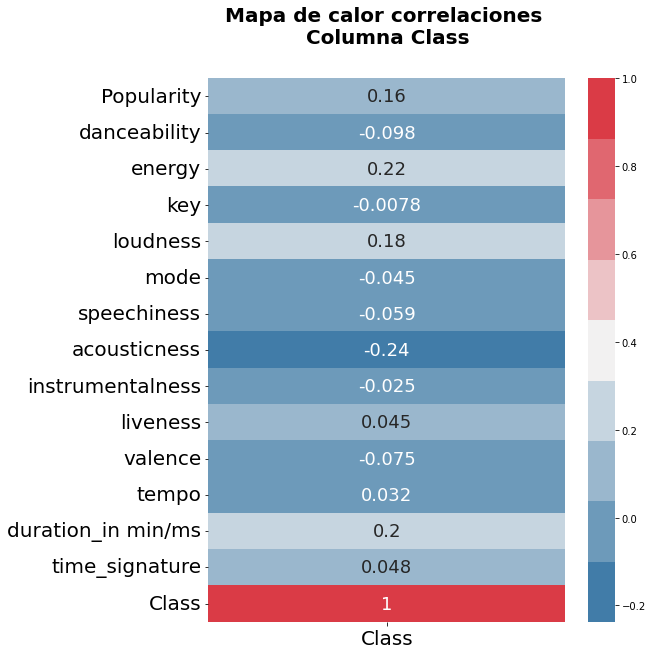

In [9]:
# Se consulta por la correlación entre la columna Class y las demás.

corr = pd.DataFrame(df.corr().loc[:,'Class']) 

fig1 = plt.figure(figsize=(8,10))
plt.suptitle("Mapa de calor correlaciones\n Columna Class",fontsize=20, fontweight='bold', x=0.43)
sns.heatmap(corr, cmap = sns.diverging_palette(240, 10, n=9), annot=True,
                  annot_kws={"size": 18})
plt.xticks(size=20)
plt.yticks(size=20, rotation=0)

Si se observan las columnas con datos faltantes, vemos que estas no tienen una correlación importante con la columna objetivo, especialmente la instrumentalidad y la nota. Por lo que se podría llegar a prescindir de estas columnas.

No obstante, debido a que algunas canciónes pueden clasificarse como 'Instrumental', la columna relacionada con la instrumentalidad, que por cierto, es la que más datos nulos contiene, se decide mantener esta columna, y también las demás, ya que eliminar 3 columnas sería demasiado.

Debido a que no se sabe bien en qué medida afectaría a la legitimidad de los datos el rellenar estas filas con datos faltantes con el promedio de cada columna, y que además no hay manera de saber los valores reales de estos datos faltantes, se decide simplemente eliminarlos del dataframe, considerando que posteriormente la porporción de testeo podría contener mayor información sobre estas columnas si se eliminaran.

In [19]:
# Se eliminan los datos nulos

df2 = df.dropna()
porc = str(np.round((len(df)- len(df2))*100/len(df),1))
print("Se han eliminado un total de",len(df)- len(df2),"filas (o canciones), aproximadamente un "+porc+"% del total de los datos.")
df = df.dropna()

Se han eliminado un total de 6183 filas (o canciones), aproximadamente un 34.4% del total de los datos.


Finalmente se exportan los datos para continuar utilizandolos más adelante.

In [20]:
df.to_csv(path_or_buf='songs.csv',index = False)